# Using request library to download the data. Storing that JSON file in midterm/data/Archive folder

In [207]:
import pylab as plt
from bs4 import BeautifulSoup
from collections import Counter
from nltk.tokenize import word_tokenize
import requests
import json
import os
import csv
import re


In [209]:

relativePath = os.getcwd()

apiKey = 'e31bc7e0e6ae4eaa88ce8784982924db'
year = 2014
month = 11 #taking a sample dataset

url = "https://api.nytimes.com/svc/archive/v1/"+str(year)+"/"+str(month)+".json?api-key="+apiKey
response = requests.get(url)
content  = response.json()

with open(relativePath+"/"+'midterm/data/jsonData_NY'+"/"+str(month)+"-"+str(year)+'.json', 'w') as file:
    json.dump(content, file)#loading the dataset

#  Analysis 1 & 2: Finding most used Category Liners in a timeLine,and we are finding the most popular category in particular timeframe


7566
[(None, 4383), ('Politics', 266), ('Dealbook', 265), ('Asia Pacific', 254), ('Europe', 192), ('Middle East', 147), ('Media', 144), ('Sunday Book Review', 144), ('Pro Football', 135), ('Music', 126)]


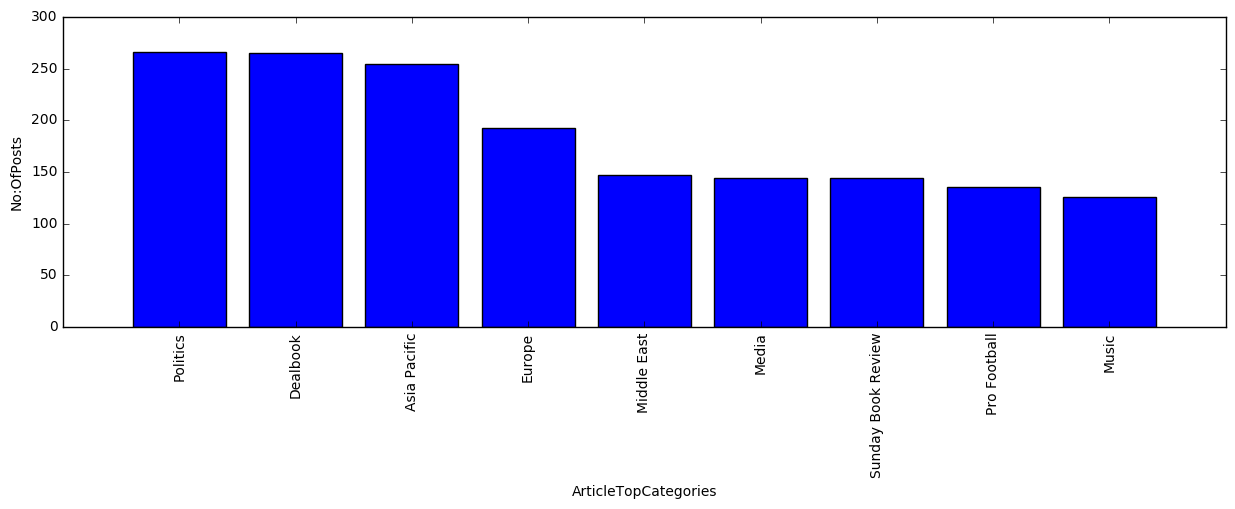

In [210]:

path = relativePath+"/"+'midterm/data/jsonData_NY'
#category wise analysisng the data
def getArticles(file, category):
    config = json.loads(open(file).read())
    for x in range(len(config['response']['docs'])):
        section = config['response']['docs'][x]['subsection_name']
        category.append(section)

    #we have to append all the article to list
    

category = []
for directory, subDirectory, filename in os.walk(path):
    for file in filename:
        getArticles(os.path.join(directory, file), category)

print(len(category))

fcount={} 
#by looping we are getting the count of every word and storing in Dictionary.

for word in category:
    count = fcount.get(word,0)
    fcount[word] = count + 1

sortedDict = sorted(fcount.items(), key=lambda x: (-x[1], x[0])) 
print(sortedDict[:10])


i = 0
oredering = []

for rank in range(len(sortedDict)):
    obj1 = sortedDict[rank]
    obj1 = obj1 + (i,)
    oredering.append(obj1) # we are giving rank to every section
    i = i+1

fileName = relativePath+"/"+'midterm/NYTS_NY.csv'
#loading the data in our disk
with open(fileName, 'w', newline='') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerow(["Category", "Count"])
    a.writerows(oredering[:10])


label = []
y = []
z = []

with open(fileName,'r') as csvfile:
    next(csvfile)
    next(csvfile)
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        label.append(row[0])
        y.append(int(row[1]))
        z.append(int(row[2]))
        

pieFig = relativePath+"/"+'midterm/Analysis_NY.png'

plt.figure(figsize=(15,4))
plt.bar(z, y, align='center')
plt.xticks(z, label, rotation=90)
plt.xlabel("ArticleTopCategories")
plt.ylabel("No:OfPosts")
plt.savefig(pieFig, bbox_inches='tight')
plt.show()


# Analysis 3 : Lets do analysis on Europe
    

In [223]:

def getValue(file, keyWords):
    config = json.loads(open(file).read())
    for x in range(len(config['response']['docs'])):
        headline = config['response']['docs'][x]['headline']['main']
        if 'Europe' in headline: #collecting the raw data that contains europe
            for y in range(len(config['response']['docs'][x]['keywords'])):
                val = config['response']['docs'][x]['keywords'][y]['value']
                keyWords.append(val)

    
    #similar to the code used above,here we are partcularly interseted in liners dealing with europe

keyWords = [] #creating a list for keywords
for directory, subDirectory, filename in os.walk(path):
    for file in filename:
        getValue(os.path.join(directory, file), keyWords)

In [224]:
#writing the uniques words to txt file.
with open(relativePath+"/"+'midterm/keyWords.txt', "w") as f:
    for uniq in keyWords:
        f.write(uniq)
        f.write("\n")

In [225]:
with open(relativePath+"/"+'midterm/keyWords.txt', "r") as f:
    data = f.readlines()
    #SIMILAR TO ASSIGNMENT 2
unique_words = {} 
for word in data: #find unique ones and adding 
    word = word.replace("\n", "")
    if word in unique_words:
        unique_words[word] += 1
    else:
        unique_words[word] = 1
        
sortedDict = sorted(unique_words.items(), key=lambda x: (-x[1], x[0]))
    
newList = sortedDict[1:11]
print(newList)

[('European Union', 11), ('European Central Bank', 8), ('European Commission', 8), ('European Sovereign Debt Crisis (2010- )', 8), ('European Parliament', 6), ('France', 5), ('Germany', 5), ('Banking and Financial Institutions', 3), ('Economic Conditions and Trends', 3), ('Francis', 3)]


In [226]:


# we have to assign the rank now to words:

i = 1
newKeyWordList = []

for rank in range(len(newList)):
    obj1 = newList[rank]
    obj1 = obj1 + (i,)
    newKeyWordList.append(obj1)
    i = i+1



In [227]:

#saving the output csv files

fileNameNew = relativePath+"/"+'midterm/Europe.csv'

with open(fileNameNew, 'w', newline='') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerow(["KeyWords", "Count", "Rank"])
    a.writerows(newKeyWordList)



In [228]:
# graphicalRepresentation
key = []
count = []
rank = []

# log-log figure
with open(fileNameNew,'r') as csvfile:
    next(csvfile)
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        key.append(str((row[0])))
        count.append(int(row[1]))
        rank.append(int(row[2]))

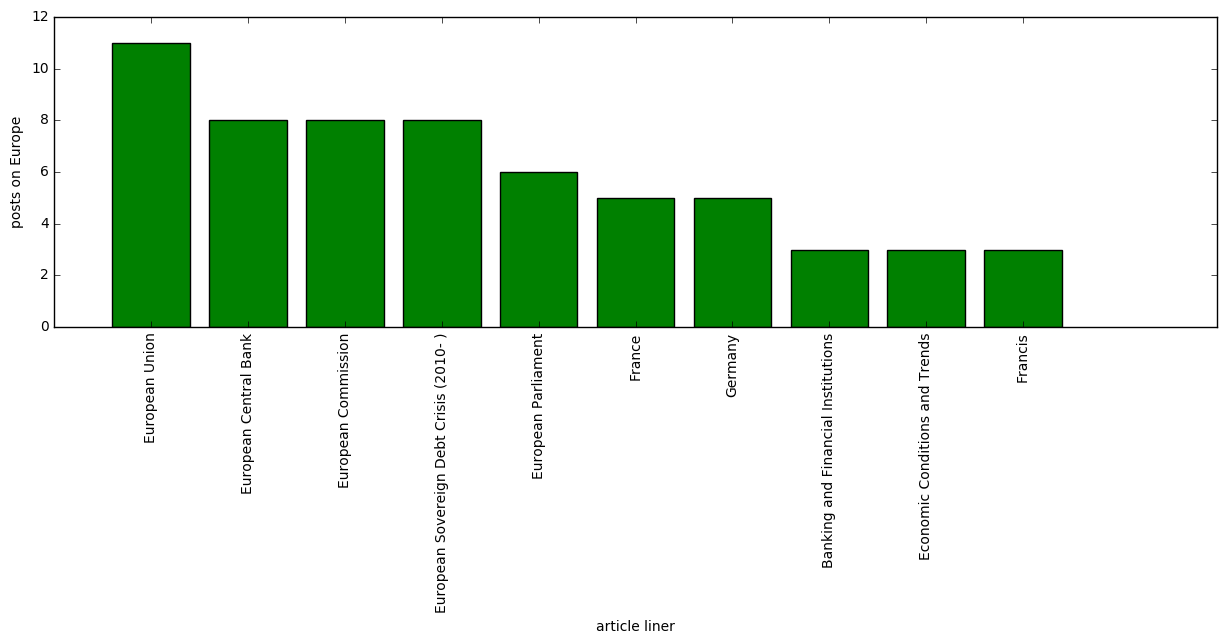

In [229]:
# Plotting bar graph showing sub categories.

exportFig = relativePath+"/"+'midterm/Europe.png'
plt.figure(figsize=(15,4))
plt.bar(rank, count, align='center', color='green')
plt.xticks(rank, key, rotation=90)
plt.xlabel("article liner")
plt.ylabel("posts on Europe")
plt.savefig(exportFig, bbox_inches='tight')
plt.show()